<div style="margin: 0 auto; text-align: center; width: 500px;">
    <h1><font color='#7985E0'>Final</font><font color='#F29496'> Pemrosesan Citra Digital</font></h1>
<div>

<div>
    <div style="margin: 0 auto; text-align: center; width: 500px;">
        <img src="https://drive.google.com/uc?id=1Y2Qa88dTnR80uhwDQ-qyMc3wye9CcMdx" alt="foto" style="width:250px; height:250px"><br>
        <b>
            <font color="#7985E0">
                Iman Mustika Ismail<br>
                H071201050<br>
                Pemrosesan Citra Digital - B
            </font></b>
    </div>
</div>

---
<div class="alert alert-block alert-info">
    <h2>Table of Contents<a class="anchor" id="tableOfContentss"></a></h2>
    <ul>
        <li><a href="#librari">Library</a></li>
        <li><a href="#number1">No. 1</a></li>
        <li><a href="#number2">No. 2</a></li>
        <li><a href="#number3">No. 3</a></li>
        <li><a href="#number4">No. 4</a></li>
    </ul>
</div>

## Library<a class="anchor" id="librari"></a>
---

In [36]:
# Importing library
import numpy as np
# import numpy.fft as npfp
# from scipy import fftpack
from skimage import filters, feature
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, median_filter, binary_fill_holes
import cv2 as cv
# from matplotlib.colors import LogNorm
import matplotlib.pylab as pylab

import warnings 
warnings.filterwarnings('ignore')

## Nomor 1 <a class="anchor" id="number1"></a>
---

1. Hilangkan _noise_ periodik pada gambar **lena_priodic2.bmp**

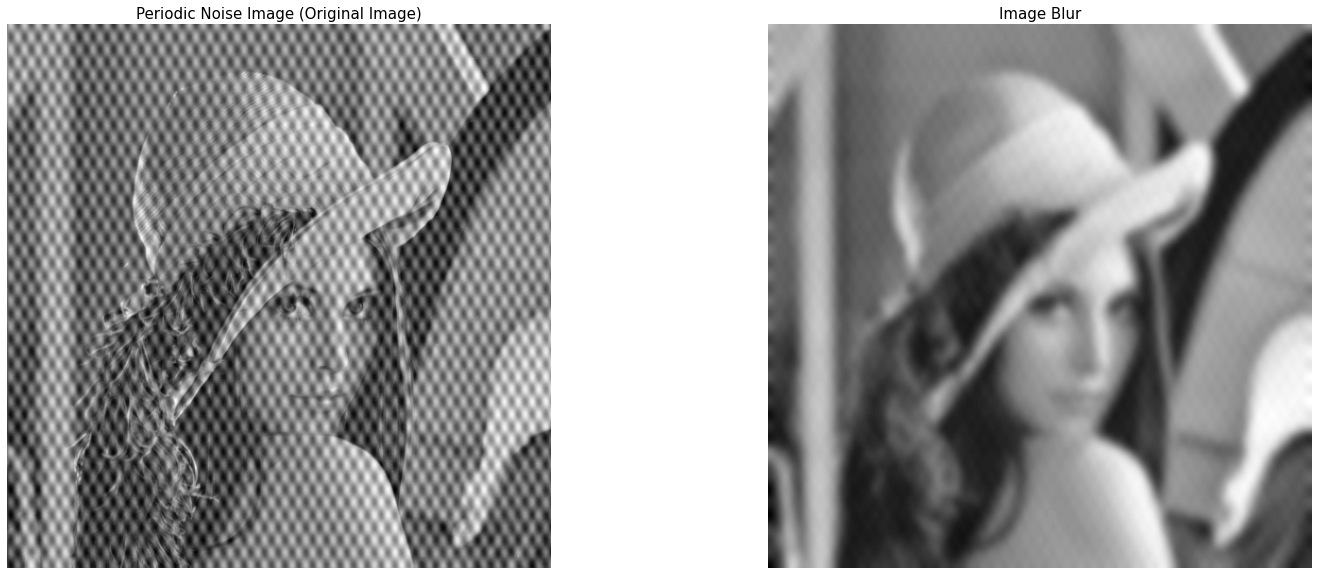

In [37]:
# Read image
img_lenaPriodic2 = rgb2gray(imread('lena_priodic2.bmp'))

# Fourier transform
img_lenaPriodic2_blur = gaussian_filter(img_lenaPriodic2, 5)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(121)
pylab.imshow(img_lenaPriodic2, cmap='gray')
pylab.axis('off')
pylab.title('Periodic Noise Image (Original Image)', fontsize=15)
pylab.subplot(122)
pylab.imshow(img_lenaPriodic2_blur, cmap='gray')
pylab.axis('off')
pylab.title('Image Blur', fontsize=15)
pylab.show()

## Nomor 2<a class="anchor" id="number2"></a>
---

2. Lakukan deteksi tepi menggunakan operator _Prewitt_ pada citra **phone_noise.png** dengan terlebih dahulu memproses _median filter_ pada citra tersebut.

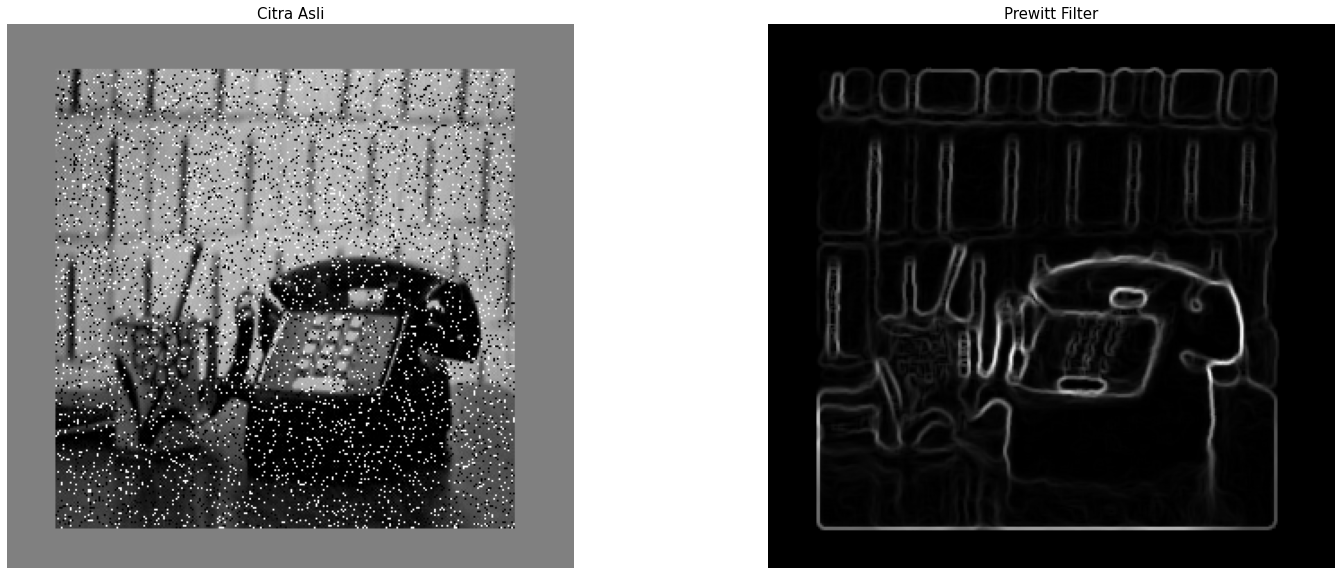

In [38]:
# Read image
img_phoneNoise = rgb2gray(imread('phone_noise.png'))

# Median Filter
img_phoneNoise_median = median_filter(img_phoneNoise, size=8)

# Edge detector using Prewitt filter
img_phoneNoise_prewitt = filters.prewitt(img_phoneNoise_median)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(121)
pylab.imshow(img_phoneNoise, cmap='gray')
pylab.axis('off')
pylab.title('Citra Asli', fontsize=15)
pylab.subplot(122)
pylab.imshow(img_phoneNoise_prewitt, cmap='gray')
pylab.axis('off')
pylab.title('Prewitt Filter', fontsize=15)
pylab.show()

## Nomor 3<a class="anchor" id="number3"></a>
---

3. Hilangkan semua bagian yang berlubang pada citra **coins-binary.png**

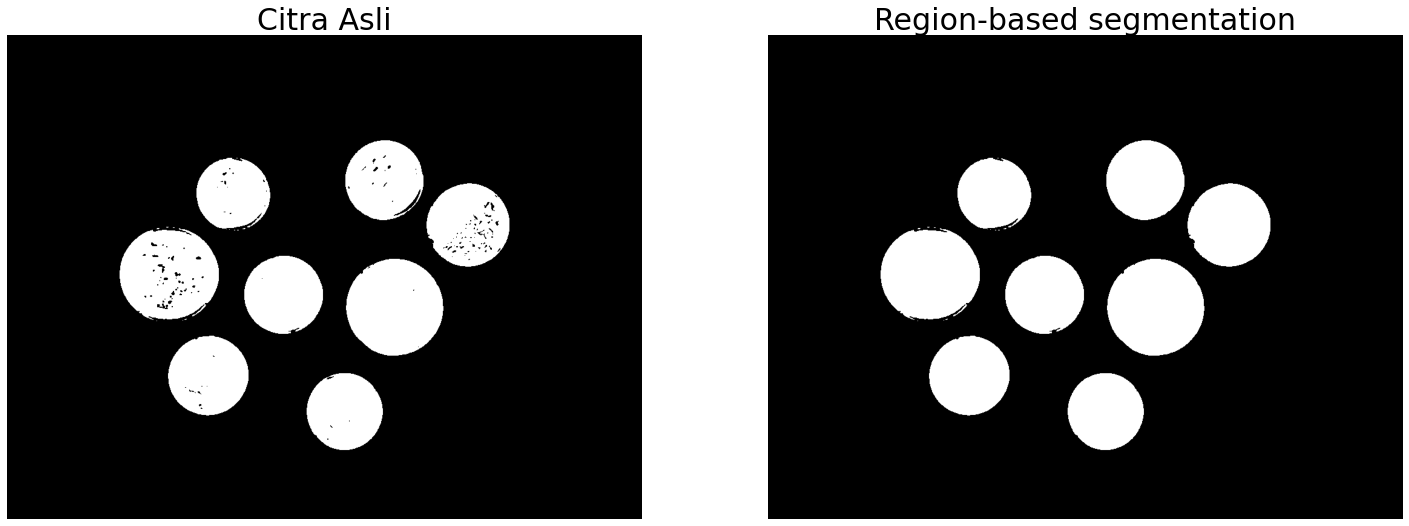

In [39]:
# Read image
img_coinsBinary = rgb2gray(imread('coins-binary.png'))

# region-based segmentation
img_coinsBinary_segment = binary_fill_holes(img_coinsBinary)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(121)
pylab.imshow(img_coinsBinary, cmap='gray')
pylab.axis('off')
pylab.title('Citra Asli', fontsize=30)
pylab.subplot(122)
pylab.imshow(img_coinsBinary_segment, cmap='gray')
pylab.axis('off')
pylab.title('Region-based segmentation', fontsize=30)
pylab.show()

## Nomor 4<a class="anchor" id="number4"></a>
---

4. Segmentasi citra **lena_color.tif** menggunakan _K-Mean clustering_ dengan $K = 3$.

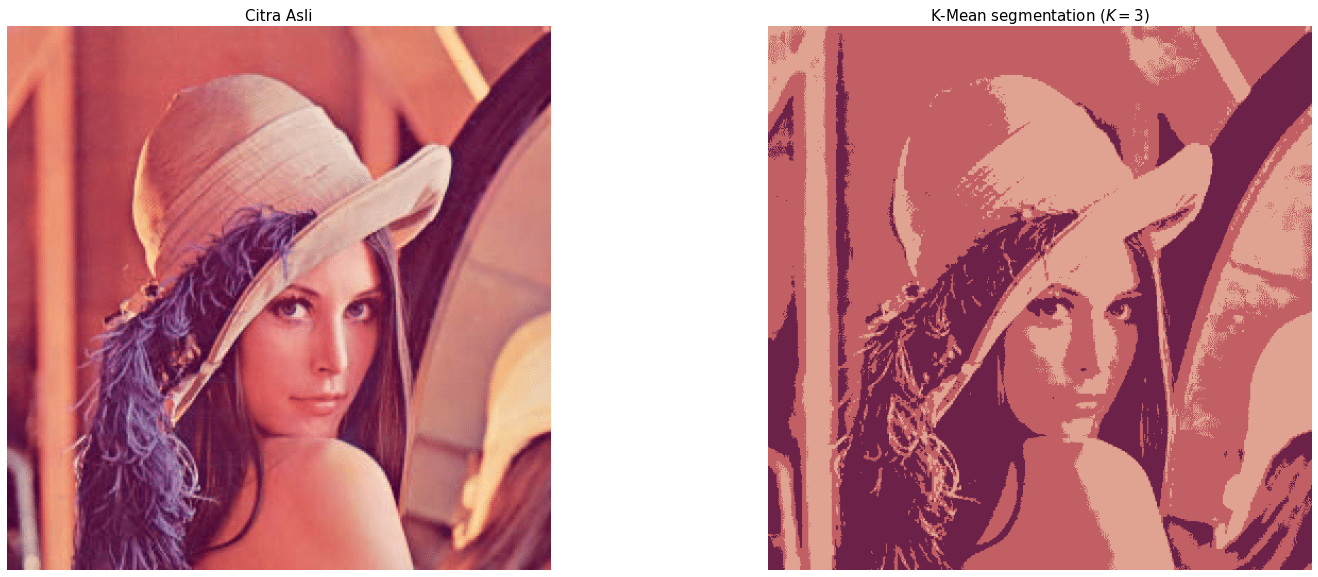

In [40]:
# Read image
img_lenaColor = cv.cvtColor(cv.imread('lena-color.tif'), cv.COLOR_BGR2RGB)
img_lenaColor_reshape = np.float32(img_lenaColor.reshape((-1, 3)))

# Image segmentation using K-means with K = 3
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, (centers) = cv.kmeans(img_lenaColor_reshape, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)


centers = np.uint8(centers)
labels = labels.flatten()

img_lenaColor_segmented = centers[labels.flatten()]
img_lenaColor_segmented = img_lenaColor_segmented.reshape(img_lenaColor.shape)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(121)
pylab.imshow(img_lenaColor)
pylab.axis('off')
pylab.title('Citra Asli', fontsize=15)
pylab.subplot(122)
pylab.imshow(img_lenaColor_segmented)
pylab.axis('off')
pylab.title('K-Mean segmentation (' + r'$K=3$' +')', fontsize=15)
pylab.show()

<div style=" text-align: center; margin-top: 50px;">
    <a class="button" 
       href="#tableOfContentss" 
       style="border: none; 
          background-color: inherit;
          padding: 7px 14px;
          font-size: 16px;
          border-radius: 11px;
          cursor: pointer;
          display: inline-block;
          background-color: dodgerblue;
          color: white;">
        Kembali ke "Table of Contents"
    </a><br>
    <h5 style="color:gray;
               margin-top: 30px;">
        Iman Mustika Ismail ©2022
    </h5>
</div>